In [3]:
#increase the display size to 95% of window width
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_result { max-width:95% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import os
%matplotlib inline
path = os.getcwd().split('/')

machine_path = '/' + path[1] + '/' + path[2]

plt.style.use(machine_path+'/opt/scripts/des.mplstyle')

In [152]:
##############################################################################
# Plot a data: domain, velocity field and rheology
##############################################################################

# total model horizontal extent (m)
Lx = 4000 * 1.0e3

# total model vertical extent (m)
Lz = 700 * 1.0e3

# number of points in horizontal direction
Nx = 401

# number of points in vertical direction
Nz = 71

# thickness of sticky air layer (m)
thickness_sa = 40 * 1.0e3

# thickness of lower crust (m)
thickness_lower_crust = 20 * 1.0e3

# thickness of upper crust (m)
thickness_upper_crust = 20 * 1.0e3

# total thickness of lithosphere (m)
thickness_litho = 80 * 1.0e3#130 * 1.0e3


x = np.linspace(0, Lx, Nx)
z = np.linspace(Lz, 0, Nz)
X, Z = np.meshgrid(x, z)
dz = Lz / (Nz - 1)

interfaces = {
    "litho_LAB": np.ones(Nx) * (thickness_litho + thickness_sa), #lab horizontal
    "litho_HETERO": np.ones(Nx) * (thickness_litho + thickness_sa), #interface entre central e lateral -  interface 
    "lower_crust": np.ones(Nx) * (thickness_lower_crust + thickness_upper_crust + thickness_sa),
    "upper_crust": np.ones(Nx) * (thickness_upper_crust + thickness_sa),
    "air": np.ones(Nx) * (thickness_sa),
    }

#Building craton
dx = Lx/(Nx-1)
# Lcraton = 600.0e3 #m
Lcraton = 1200.0e3 #m
#     Lcraton = 2000.0e3 #m
thickening = thickness_litho + 120.e3 #m
shift_craton = 0.0e3 #m

Ncraton = int(Lcraton//dx) #largura em indices

Nshift = int(shift_craton//dx)

interfaces['litho_LAB'][Nx//2 - Ncraton//2 + Nshift : Nx//2 + Ncraton//2 + Nshift] = thickness_sa + thickening

#Building mobile belt
interfaces['litho_HETERO'][Nx//2 - Ncraton//2 + Nshift : Nx//2 + Ncraton//2 + Nshift] = thickness_sa + thickening
Lmb = 300.0e3 #length of mobile belt
N_Lmb = int(Lmb//dx)
# thinning = 50.0e3
thinning = 100.0e3

interfaces['litho_HETERO'][Nx//2 - N_Lmb//2 + Nshift : Nx//2 + N_Lmb//2 + Nshift] = thickness_sa + thickening - thinning

############################################################################################################################
#interfaces with shift craton of 700 km
############################################################################################################################

# Interfaces (bottom first)
interfaces_sc = {
    "litho_LAB": np.ones(Nx) * (thickness_litho + thickness_sa), #lab horizontal
    "lower_crust": np.ones(Nx) * (thickness_lower_crust + thickness_upper_crust + thickness_sa),
    "upper_crust": np.ones(Nx) * (thickness_upper_crust + thickness_sa),
    "air": np.ones(Nx) * (thickness_sa),
    }

#Building craton
dx = Lx/(Nx-1)
# Lcraton = 600.0e3 #m
Lcraton = 1200.0e3 #m
#     Lcraton = 2000.0e3 #m
thickening = thickness_litho + 120.e3 #m
shift_craton = 700.0e3 #m

Ncraton = int(Lcraton//dx) #largura em indices

Nshift = int(shift_craton//dx)

interfaces_sc['litho_LAB'][Nx//2 - Ncraton//2 + Nshift : Nx//2 + Ncraton//2 + Nshift] = thickness_sa + thickening


#Velocity field
fac_air = 10.0e3

#Left side
# 1 cm/year
vL = 0.005 / (365 * 24 * 3600)  # m/s

h_v_const = thickness_litho + 20.0e3  #thickness with constant velocity 
ha = Lz - thickness_sa - h_v_const  # difference

#Right side
vR = 2 * vL * (h_v_const + fac_air + ha) / ha  # this is to ensure integral equals zero

VX = np.zeros_like(X)
cond = (Z > h_v_const + thickness_sa) & (X == 0) #left side
VX[cond] = vR * (Z[cond] - h_v_const - thickness_sa) / ha

cond = (Z > h_v_const + thickness_sa) & (X == Lx) #right side
VX[cond] = vR * (Z[cond] - h_v_const - thickness_sa) / ha

# cond = X == Lx #right side
# VX[cond] += +2 * vL

cond = Z <= thickness_sa - fac_air
VX[cond] = 0

# print(np.sum(VX))

v0 = VX[(X == 0)]
vf = VX[(X == Lx)]
sv0 = np.sum(v0[1:-1]) + (v0[0] + v0[-1]) / 2.0
svf = np.sum(vf[1:-1]) + (vf[0] + vf[-1]) / 2.0
# print(sv0, svf, svf - sv0)

diff = (svf - sv0) * dz

vv = -diff / Lx
# print(vv, diff, svf, sv0, dz, Lx)

VZ = np.zeros_like(X)

cond = Z == 0
VZ[cond] = vv
#save bc to plot arraows in numerical setup
vels_bc = np.array([v0, vf])
vz0 = VZ[(z == 0)]

##############################################################################
# Plot b data: YSE
##############################################################################

L = Lz #130.0E3
N = 2*Nz-1 #261
z_yse = np.linspace(0,L,N)
dz_yse = z_yse[1]-z_yse[0]

rho = np.zeros_like(z_yse)
uc = z_yse<=20.0E3
lc = (z_yse>20.0E3)&(z_yse<=40.0E3)
lm = (z_yse>40.0E3)

rho[uc]=2700.0
rho[lc]=2800.0
rho[lm]=3354.0
g = 10.0

P = 0.0
Paux = 0.0
for i in range(1,N):
    Paux += dz_yse*rho[i]*g
    P = np.append(P,Paux)

phi = 2.0*np.pi/180.0
c0 = 4.0E6
sigma_min = c0 * np.cos(phi) + P * np.sin(phi)

phi = 15.0*np.pi/180.0
c0 = 20.0E6
sigma_max = c0 * np.cos(phi) + P * np.sin(phi)

#rheological params
Q = np.zeros_like(z_yse)
A = np.zeros_like(z_yse)
n = np.zeros_like(z_yse)
V = np.zeros_like(z_yse)
C = np.zeros_like(z_yse)

Q[uc]=222000.0
Q[lc]=222000.0
Q[lm]=540000.0

A[uc]=8.574E-28
A[lc]=8.574E-28
A[lm]=2.4168E-15

n[uc]=4.0
n[lc]=4.0
n[lm]=3.5

V[uc]=0.0
V[lc]=0.0
V[lm]=25.0E-6

T_yse = 1300 * z_yse / L

kappa = 1.0e-6

ccapacity = 1250

H = np.zeros_like(z_yse)
Huc = 2.5E-6/2700.0#old 9.2e-10
Hlc = 0.8E-6/2800.0#old 2.9e-10

H[uc] = Huc
H[lc] = Hlc

Taux = np.copy(T_yse)
t = 0
dt = 1000
dt_sec = dt * 365 * 24 * 3600

while t < 500.0e6:
    T_yse[1:-1] += kappa*dt_sec*((T_yse[2:]+T_yse[:-2]-2*T_yse[1:-1])/dz_yse**2) + H[1:-1]*dt_sec/ccapacity
    t = t + dt

#plt.plot(T,-z/1000)

#strain rate (sr)
sr = 1.0E-15

#gas constant
R = 8.314

#print(n)

#Temperature Kelvin
TK = T_yse + 273

# ##############################################################################
# # Plot d data: thermal profiles
# ##############################################################################

z = np.linspace(Lz, 0, Nz)
dz = Lz / (Nz - 1)

DTS = [0, 100, 200]
Tzs = []

for DT in DTS:
    T = 1300 * (z - thickness_sa) / (thickness_litho)  # Temperature

    ccapacity = 1250*1.0 #937.5=75% #J/kg/K?

    TP = 1262 #mantle potential temperature

    Ta = (TP / np.exp(-10 * 3.28e-5 * (z - thickness_sa) / ccapacity)) + DT
    # Ta = 1262 / np.exp(-10 * 3.28e-5 * (z - thickness_sa) / ccapacity)

    T[T < 0.0] = 0.0
    cond1 = Ta<T #VICTOR
    T[T > Ta] = Ta[T > Ta] #apply the temperature of asthenosphere Ta where temperature T is greater than Ta, 

    # kappa = 0.75*1.0e-6 #thermal diffusivity
    kappa = 1.0e-6 #thermal diffusivity

    H = np.zeros_like(T)

    cond = (z >= thickness_sa) & (z < thickness_upper_crust + thickness_sa)  # upper crust
    H[cond] = Huc

    cond = (z >= thickness_upper_crust + thickness_sa) & (
        z < thickness_lower_crust + thickness_upper_crust + thickness_sa
    )  # lower crust
    H[cond] = Hlc

    Taux = np.copy(T)
    t = 0
    dt = 5000
    dt_sec = dt * 365 * 24 * 3600
    cond = cond1 | (T == 0)  # (T > 1300) | (T == 0) #VICTOR
    dz = Lz / (Nz - 1)

    
    while t < 500.0e6:
        T[1:-1] += (
            kappa * dt_sec * ((T[2:] + T[:-2] - 2 * T[1:-1]) / dz ** 2)
            + H[1:-1] * dt_sec / ccapacity
        )
        T[cond] = Taux[cond]
        t = t + dt
    
    T = np.ones_like(X) * T[:, None] #(Nz, Nx)

    Tz = np.copy(T)
    Tzs.append(Tz)

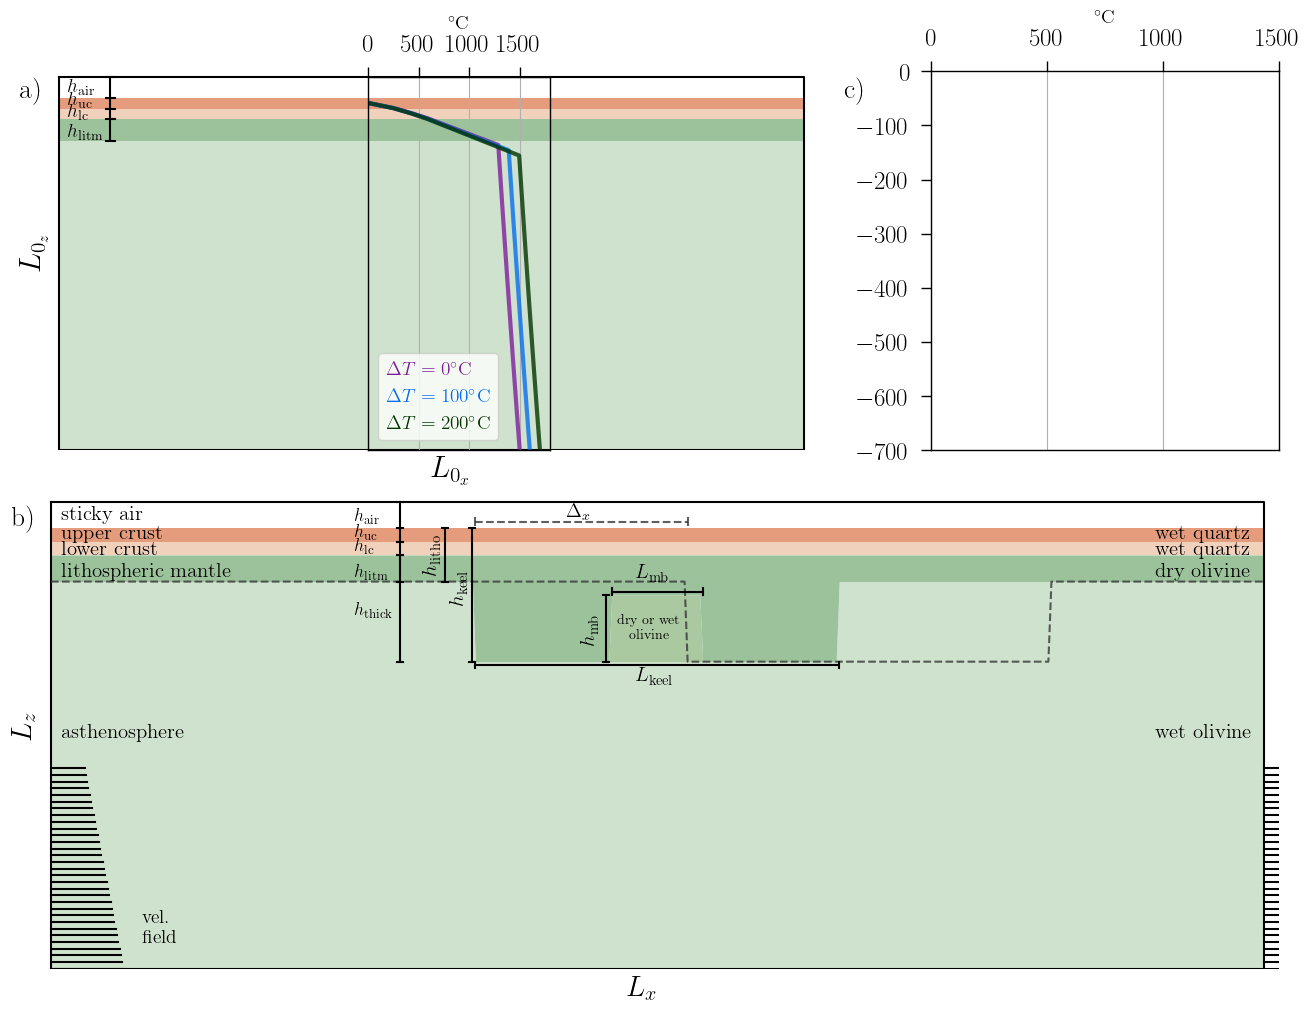

In [206]:
plt.close()
fig = plt.figure(figsize=(13,10), constrained_layout=True)
mosaic = """
         AAC
         BBB
         """
axs = fig.subplot_mosaic(mosaic, gridspec_kw={'height_ratios':[0.4,0.5]})
fsize=16

##############################################################################
# Subplot a) Stability
##############################################################################
Lx_stab = 1600 * 1.0e3
Lz_stab = 700 * 1.0e3

Nx_stab = 161
Nz_stab = 71

x_stab = np.linspace(0, Lx_stab, Nx_stab)
z_stab = np.linspace(Lz_stab, 0, Nz_stab)
X_stab, Z_stab = np.meshgrid(x_stab, z_stab)
dz_stab = Lz_stab/ (Nz_stab - 1)

# Interfaces (bottom first)
interfaces_stab = {
    "litho_LAB": np.ones(Nx_stab) * (thickness_litho + thickness_sa), #lab horizontal
    "lower_crust": np.ones(Nx_stab) * (thickness_lower_crust + thickness_upper_crust + thickness_sa),
    "upper_crust": np.ones(Nx_stab) * (thickness_upper_crust + thickness_sa),
    "air": np.ones(Nx_stab) * (thickness_sa),
    }

axs['A'].text(-0.02, 0.95, 'a)', color='k', fontsize=20,
        horizontalalignment='left', verticalalignment='center',
        transform=axs['A'].transAxes)

axs['A'].set_xlim(0 - 50, Lx_stab/1000 + 50)
axs['A'].set_ylim(-Lz_stab/1000, 10)
axs['A'].axis('off')

#box domain contour
axs['A'].plot([0,0,Lx_stab/1000,Lx_stab/1000,0],[0,-Lz_stab/1000,-Lz_stab/1000,0,0],"k")

#paint layers
a1_stab = interfaces_stab["litho_LAB"]
a2_stab = a1_stab*0+700.0E3

axs['A'].fill_between(x_stab/1000,-a1_stab/1000,-a2_stab/1000,fc=color_ast,ec="face",lw=0.0)

a2_stab = np.copy(a1_stab)
a1_stab = interfaces_stab["lower_crust"]
axs['A'].fill_between(x_stab/1000,-a1_stab/1000,-a2_stab/1000,fc=color_lit,ec="face",lw=0.0)

a2_stab = np.copy(a1_stab)
a1_stab = interfaces_stab["upper_crust"]
axs['A'].fill_between(x_stab/1000,-a1b/1000,-a2_stab/1000,fc=color_lc,ec="face",lw=0.0)

a2_stab = np.copy(a1_stab)
a1_stab= interfaces_stab["air"]
axs['A'].fill_between(x_stab/1000,-a1_stab/1000,-a2_stab/1000,fc=color_uc,ec="face",lw=0.0)

xpos = 110
axs['A'].plot([xpos, xpos], [-0,-120], "k") #vertical bar
axs['A'].plot([xpos-10, xpos+10], [0, 0], "k") #upper horizontal bar
axs['A'].plot([xpos-10, xpos+10], [-40, -40], "k") #upper horizontal bar
axs['A'].plot([xpos-10, xpos+10], [-60, -60], "k") #base of upper crust
axs['A'].plot([xpos-10, xpos+10], [-80, -80], "k") #base of lower crust
axs['A'].plot([xpos-10, xpos+10], [-120, -120], "k") #base of litho
axs['A'].text(xpos-90, -30, r"$h_{\mathrm{air}}$", fontsize=fsize-2)
axs['A'].text(xpos-90, -54, r"$h_{\mathrm{uc}}$", fontsize=fsize-2)
axs['A'].text(xpos-90, -74, r"$h_{\mathrm{lc}}$", fontsize=fsize-2)
axs['A'].text(xpos-90, -112, r"$h_{\mathrm{litm}}$", fontsize=fsize-2)

#Lz and Lx
axs['A'].text(-85, -350, r"$L_{0_z}$",rotation=90, fontsize=fsize+6)
axs['A'].text(Lx_stab/2.0e3, -Lz_stab/1000-50, r"$L_{0_x}$", fontsize=fsize+6)

# ##############################################################################
# # Inset - Thermal profiles
# ##############################################################################
label_size=18
plt.rc('xtick', labelsize=label_size)
plt.rc('ytick', labelsize=label_size)

ax_aux = axs['A'].inset_axes([0.42,
                              0.001,
                              0.23,
                              0.985])

ax_aux.get_yaxis().set_visible(False)
ax_aux.set_xlabel('$^{\circ}$C', fontsize=label_size-4)
ax_aux.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax_aux.xaxis.set_label_position('top')
ax_aux.set_facecolor("none")
ax_aux.xaxis.grid('-k', alpha=1)

ax_aux.set_xlim([0,1800])
ax_aux.set_xticks([0, 500, 1000, 1500])
ax_aux.set_ylim(-Lz/1000, 10)

z = np.linspace(Lz, 0, Nz)
cT = z>=40.0e3

colors = ['xkcd:purple', 'xkcd:cerulean blue', 'xkcd:dark green']#, 'xkcd:orange', 'xkcd:scarlet']
lines = ['-', '-', '-']

for Tz, color, line in zip(Tzs, colors, lines):
    ax_aux.plot(Tz[cT], -(z[cT]/1000), line, color=color, linewidth=3, alpha=0.8)

axt = ax_aux.twinx()
axt1 = ax_aux.twinx()
axt.axis('off')
axt1.axis('off')

axt.plot([-10, -10], [-10, -10], '-k', label='CLS')
# axt.legend(loc='center left', handlelength=1.5, handletextpad=0.5, fontsize=14)

axt1.plot([-10, -10], '-', color='xkcd:purple', label=r'$\Delta T = 0^{\circ}$C')
axt1.plot([-10, -10], '-', color='xkcd:cerulean blue', label=r'$\Delta T = 100^{\circ}$C')
axt1.plot([-10, -10], '-', color='xkcd:dark green', label=r'$\Delta T = 200^{\circ}$C')
axt1.legend(loc='lower left', labelcolor='linecolor', handlelength=0, handletextpad=0, fontsize=14)


##############################################################################
# Subplot b) interfaces,  Layers, veloc field
##############################################################################

# axs['B'].text(-120, 12, r"a)", size=20)
axs['B'].text(-0.02, 0.95, 'b)', color='k', fontsize=20,
        horizontalalignment='left', verticalalignment='center',
        transform=axs['B'].transAxes)

axs['B'].set_xlim(0 - 50, Lx/1000 + 50)
axs['B'].set_ylim(-Lz/1000, 10)
axs['B'].axis('off')

#box domain contour
axs['B'].plot([0,0,Lx/1000,Lx/1000,0],[0,-Lz/1000,-Lz/1000,0,0],"k")

#paint layers
a1 = interfaces["litho_LAB"]
a2 = a1*0+700.0E3
axs['B'].fill_between(x/1000,-a1/1000,-a2/1000,fc=color_ast,ec="face",lw=0.0)

a2 = np.copy(a1)
a1 = interfaces["litho_HETERO"]
axs['B'].fill_between(x/1000,-a1/1000,-a2/1000,fc='xkcd:dull green',ec="face",lw=0.0, alpha=0.6) #grey green

a2 = np.copy(a1)
a1 = interfaces["lower_crust"]
axs['B'].fill_between(x/1000,-a1/1000,-a2/1000,fc=color_lit,ec="face",lw=0.0)

a2 = np.copy(a1)
a1 = interfaces["upper_crust"]
axs['B'].fill_between(x/1000,-a1/1000,-a2/1000,fc=color_lc,ec="face",lw=0.0)

a2 = np.copy(a1)
a1 = interfaces["air"]
axs['B'].fill_between(x/1000,-a1/1000,-a2/1000,fc=color_uc,ec="face",lw=0.0)

axs['B'].plot(x/1.0e3, -interfaces_sc["litho_LAB"]/1.0e3, '--', color='xkcd:dark grey', alpha=0.8)
#Length of shift craton
xpos_sc = Lx/2.0e3 - Lcraton/2.0e3 #1850 km
axs['B'].plot([xpos_sc, xpos_sc], [-30+5,-30-5], color='xkcd:dark grey', alpha=0.8) #vertical bar
axs['B'].plot([xpos_sc, xpos_sc+shift_craton/1.0e3], [-30,-30], "--", color='xkcd:dark grey', alpha=0.8) #horizontal bar
axs['B'].plot([xpos_sc+shift_craton/1.0e3, xpos_sc+shift_craton/1.0e3], [-30+5,-30-5], color='xkcd:dark grey', alpha=0.8) #vertical bar
axs['B'].text(Lx/2.0e3-shift_craton/2.0e3+50, -22, r"$\Delta_x$", fontsize=fsize-2, rotation=0)

scale_veloc = 20000*365.*24.*3600.
for i in range(0, np.size(z)-40, 1):
    if VX[i,0]!=0.0:
        axs['B'].plot([scale_veloc*VX[i, 0],0], [-z[i]/1000,-z[i]/1000], "k")

for i in range(0, np.size(z)-40, 1):
    axs['B'].plot([scale_veloc*VX[i, -1]+Lx/1000, Lx/1000], [-z[i]/1000,-z[i]/1000], "k")


axs['B'].text(300,-660,"vel.\nfield",fontsize=fsize-2)

#Naming layers
fsize=15
axs['B'].text(0.02, 0.96, "sticky air", fontsize=fsize,
              horizontalalignment='left', verticalalignment='center',
              transform=axs['B'].transAxes)
axs['B'].text(0.02, 0.92, "upper crust", fontsize=fsize,
              horizontalalignment='left', verticalalignment='center',
              transform=axs['B'].transAxes)
axs['B'].text(0.02, 0.885, "lower crust", fontsize=fsize,
              horizontalalignment='left', verticalalignment='center',
              transform=axs['B'].transAxes)
axs['B'].text(0.02, 0.84, "lithospheric mantle", fontsize=fsize,
              horizontalalignment='left', verticalalignment='center',
              transform=axs['B'].transAxes)
axs['B'].text(0.02, 0.50, "asthenosphere", fontsize=fsize,
              horizontalalignment='left', verticalalignment='center',
              transform=axs['B'].transAxes)

#Rheology
axs['B'].text(0.9, 0.92, 'wet quartz', color='k', fontsize=fsize,
              horizontalalignment='left', verticalalignment='center',
              transform=axs['B'].transAxes)
axs['B'].text(0.9, 0.885, 'wet quartz', color='k', fontsize=fsize,
              horizontalalignment='left', verticalalignment='center',
              transform=axs['B'].transAxes)
axs['B'].text(0.9, 0.84, 'dry olivine', color='k', fontsize=fsize,
              horizontalalignment='left', verticalalignment='center',
              transform=axs['B'].transAxes)
axs['B'].text(0.9, 0.50, 'wet olivine', color='k', fontsize=fsize,
              horizontalalignment='left', verticalalignment='center',
              transform=axs['B'].transAxes)

axs['B'].text(0.493, 0.72, 'dry or wet\nolivine', color='k', fontsize=fsize-5,
              horizontalalignment='center', verticalalignment='center',
              transform=axs['B'].transAxes)

xpos = 1390

#thickness of cratonic region
axs['B'].plot([xpos-10, xpos+10], [-40, -40], "k") #upper horizontal bar
axs['B'].plot([xpos, xpos], [-40,-240], "k") #vertical bar
axs['B'].plot([xpos-10, xpos+10], [-240, -240], "k") #lower horizontal bar
axs['B'].text(xpos-75, -150, r"$h_{\mathrm{keel}}$", fontsize=fsize, rotation=90)

#thickness of non-cratonic region
xpos2 = 1300    
axs['B'].plot([xpos2-10, xpos2+10], [-40, -40], "k") #upper horizontal bar
axs['B'].plot([xpos2, xpos2], [-40,-120], "k") #vertical bar
axs['B'].plot([xpos2-10, xpos2+10], [-120, -120], "k") #lower horizontal bar
axs['B'].text(xpos2-75, -105, r"$h_{\mathrm{litho}}$", fontsize=fsize, rotation=90)

#thickness of non-cratonic region
xpos3 = 1150
axs['B'].plot([xpos3, xpos3], [-0,-240], "k") #vertical bar
axs['B'].plot([xpos3-10, xpos3+10], [0, 0], "k") #upper horizontal bar
axs['B'].plot([xpos3-10, xpos3+10], [-40, -40], "k") #upper horizontal bar
axs['B'].plot([xpos3-10, xpos3+10], [-60, -60], "k") #base of upper crust
axs['B'].plot([xpos3-10, xpos3+10], [-80, -80], "k") #base of lower crust
axs['B'].plot([xpos3-10, xpos3+10], [-120, -120], "k") #base of litho
axs['B'].plot([xpos3-10, xpos3+10], [-240, -240], "k") #lower horizontal bar

#Length of Cratonic Region
xpos4 = Lx/2.0e3 - Lcraton/2.0e3 #1850 km
axs['B'].plot([xpos4, xpos4], [-245+5,-245-5], "k") #vertical bar
axs['B'].plot([xpos4, xpos4+Lcraton/1.0e3], [-245,-245], "k") #horizontal bar
axs['B'].plot([xpos4+Lcraton/1.0e3, xpos4+Lcraton/1.0e3], [-245+5,-245-5], "k") #vertical bar
axs['B'].text(Lx/2.0e3-75, -270, r"$L_{\mathrm{keel}}$", fontsize=fsize, rotation=0)

axs['B'].text(xpos-390, -30, r"$h_{\mathrm{air}}$", fontsize=fsize-2)
axs['B'].text(xpos-390, -54, r"$h_{\mathrm{uc}}$", fontsize=fsize-2)
axs['B'].text(xpos-390, -74, r"$h_{\mathrm{lc}}$", fontsize=fsize-2)
axs['B'].text(xpos-390, -112, r"$h_{\mathrm{litm}}$", fontsize=fsize-2)
axs['B'].text(xpos-390, -170, r"$h_{\mathrm{thick}}$", fontsize=fsize-2)

#Mobile Belt
xpos4 = Lx/2.0e3 - Lmb/2.0e3 #1850 km
axs['B'].plot([xpos4-10- 20, xpos4+10- 20], [-140, -140], "k") #lower horizontal bar
axs['B'].plot([xpos4- 20, xpos4- 20], [-140,-240], "k") #vertical bar
axs['B'].plot([xpos4-10- 20, xpos4+10- 20], [-240, -240], "k") #lower horizontal bar
axs['B'].text(xpos4-85- 20, -210, r"$h_{\mathrm{mb}}$", fontsize=fsize, rotation=90)

axs['B'].plot([xpos4, xpos4], [-135+5,-135-5], "k") #vertical bar
axs['B'].plot([xpos4, xpos4+Lmb/1.0e3], [-135,-135], "k") #horizontal bar
axs['B'].plot([xpos4+Lmb/1.0e3, xpos4+Lmb/1.0e3], [-135+5,-135-5], "k") #vertical bar
axs['B'].text(Lx/2.0e3-75, -115, r"$L_{\mathrm{mb}}$", fontsize=fsize, rotation=0)

#Lz and Lx
axs['B'].text(-135, -350, r"$L_z$",rotation=90, fontsize=fsize+6)
axs['B'].text(Lx/1000/2-100, -Lz/1000-40, r"$L_x$", fontsize=fsize+6)

##############################################################################
# Subplot c) Thermal profiles of keel scenarios
##############################################################################
axs['C'].text(-0.25, 0.95, 'c)', color='k', fontsize=20,
        horizontalalignment='left', verticalalignment='center',
        transform=axs['C'].transAxes)

axs['C'].set_xlim(0, 1500)
axs['C'].set_ylim(-Lz/1000, 0)

axs['C'].set_xlabel('$^{\circ}$C', fontsize=label_size-4)
axs['C'].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
axs['C'].xaxis.set_label_position('top')
axs['C'].xaxis.grid('-k', alpha=1)

# Saving figure
fig.savefig('out/' + "NumSetup_Keel.pdf", dpi=400, bbox_inches='tight')
fig.savefig('out/' + "NumSetup_Keel.png", dpi=400, bbox_inches='tight')